In [340]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [341]:
data = pd.read_csv(R'C:\Users\RajnarayanSahu\OneDrive - National Pen Company\Documents\All imp files\Data Science\Python-20220910T133417Z-001\Python\Solved_by_own\Heart_Disease\framingham.csv')

data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [342]:
#No Categorical columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [343]:
#finding nulls
round((data.isnull().mean())*100,2).sort_values(ascending=False)

glucose            9.16
education          2.48
BPMeds             1.25
totChol            1.18
cigsPerDay         0.68
BMI                0.45
heartRate          0.02
male               0.00
age                0.00
currentSmoker      0.00
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
sysBP              0.00
diaBP              0.00
TenYearCHD         0.00
dtype: float64

In [344]:
data["glucose"].isnull().value_counts()

False    3850
True      388
Name: glucose, dtype: int64

In [133]:
#(data[data["glucose"].isnull()==True]["age"].value_counts()).sort_values()
#Null values for glucose readings are between age: 34 to 69
#lets create groups of these ages and impute them by their age group's median glucose value
#Example: nulls of 30-40 = median glucose age 30-40
#data[(data["age"]>30) & (data["age"]<40)]["glucose"].median()

In [345]:
#median Glucose betn age 30-40
print("median Glucose betn age 30-40:",data[(data["age"]>=30) & (data["age"]<40)]["glucose"].median())
#median Glucose betn age 40-50
print("median Glucose betn age 40-50:",data[(data["age"]>=40) & (data["age"]<50)]["glucose"].median())
#median Glucose betn age 50-60
print("median Glucose betn age 50-60:",data[(data["age"]>=50) & (data["age"]<60)]["glucose"].median())
#median Glucose betn age 60-70
print("median Glucose betn age 70-80:",data[(data["age"]>=60) & (data["age"]<70)]["glucose"].median())

median Glucose betn age 30-40: 77.0
median Glucose betn age 40-50: 77.0
median Glucose betn age 50-60: 78.0
median Glucose betn age 70-80: 81.0


In [346]:
data.loc[(data["age"]>=30) & (data["age"]<40),"glucose"] = data[(data["age"]>=30) & (data["age"]<40)]["glucose"].fillna(77.0)
data.loc[(data["age"]>=40) & (data["age"]<50),"glucose"] = data[(data["age"]>=40) & (data["age"]<50)]["glucose"].fillna(77.0)
data.loc[(data["age"]>=50) & (data["age"]<60),"glucose"] = data[(data["age"]>=50) & (data["age"]<60)]["glucose"].fillna(78.0)
data.loc[(data["age"]>=60) & (data["age"]<70),"glucose"] = data[(data["age"]>=60) & (data["age"]<70)]["glucose"].fillna(81.0)

In [347]:
#median Glucose betn age 30-40
print("median totChol betn age 30-40:",data[(data["age"]>=30) & (data["age"]<40)]["totChol"].median())
#median Glucose betn age 40-50
print("median totChol betn age 40-50:",data[(data["age"]>=40) & (data["age"]<50)]["totChol"].median())
#median Glucose betn age 50-60
print("median totChol betn age 50-60:",data[(data["age"]>=50) & (data["age"]<60)]["totChol"].median())
#median Glucose betn age 60-70
print("median totChol betn age 70-80:",data[(data["age"]>=60) & (data["age"]<70)]["totChol"].median())

median totChol betn age 30-40: 210.0
median totChol betn age 40-50: 228.0
median totChol betn age 50-60: 243.0
median totChol betn age 70-80: 246.0


In [348]:
data.loc[(data["age"]>=30) & (data["age"]<40),"totChol"] = data[(data["age"]>=30) & (data["age"]<40)]["totChol"].fillna(210.0)
data.loc[(data["age"]>=40) & (data["age"]<50),"totChol"] = data[(data["age"]>=40) & (data["age"]<50)]["totChol"].fillna(228.0)
data.loc[(data["age"]>=50) & (data["age"]<60),"totChol"] = data[(data["age"]>=50) & (data["age"]<60)]["totChol"].fillna(243.0)
data.loc[(data["age"]>=60) & (data["age"]<70),"totChol"] = data[(data["age"]>=60) & (data["age"]<70)]["totChol"].fillna(246.0)

In [349]:
#Null Values for glucose is treated
data["glucose"].isnull().value_counts()

False    4238
Name: glucose, dtype: int64

In [350]:
#Imputing Education with mode
print("Mode in Education: ",data["education"].mode()[0])
data.loc[(data["education"].isnull()==True),"education"] = data["education"].fillna(1.0)

Mode in Education:  1.0


In [351]:
data["education"].isnull().value_counts()

False    4238
Name: education, dtype: int64

In [352]:
data[data["BPMeds"].isnull()==True].shape

(53, 16)

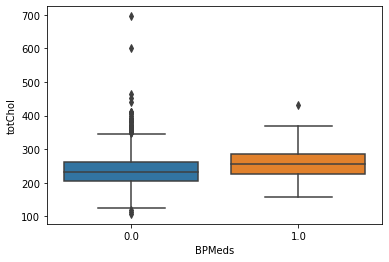

C:\Users\RajnarayanSahu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


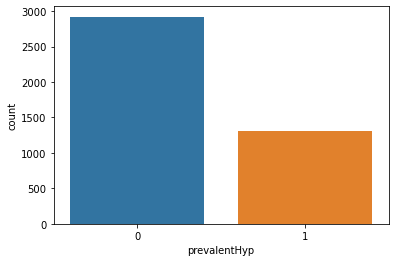

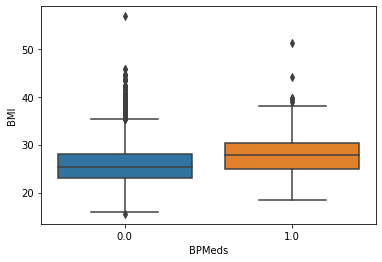

In [353]:
data[data["BPMeds"].isnull()==True]

sns.boxplot(x=data["BPMeds"],y=data["totChol"])
plt.show()
sns.countplot(data["prevalentHyp"])
plt.show()
sns.boxplot(x=data["BPMeds"],y=data["BMI"])
plt.show()

C:\Users\RajnarayanSahu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prevalentHyp', ylabel='count'>

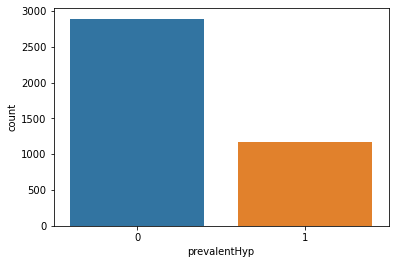

In [354]:
sns.countplot(data[data["BPMeds"]==0]["prevalentHyp"])

In [355]:
data.loc[(data["BPMeds"].isnull()==True),"BPMeds"] = data["BPMeds"].fillna(0.0)

In [356]:
data.loc[(data["cigsPerDay"].isnull()==True),"cigsPerDay"] = data["cigsPerDay"].fillna(data["cigsPerDay"].mean())
data.loc[(data["BMI"].isnull()==True),"BMI"] = data["cigsPerDay"].fillna(data["BMI"].mean())
data.loc[(data["heartRate"].isnull()==True),"heartRate"] = data["heartRate"].fillna(data["heartRate"].mean())

In [357]:
#Nulls treated
round((data.isnull().mean())*100,2).sort_values(ascending=False)

male               0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

In [358]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,77.0,0


In [413]:
data_new3 = data
data_new3
y = data_new3["TenYearCHD"]
data_new3 = data_new3.drop("education",axis=1)

In [414]:
X = data_new3.iloc[:,0:14]
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

In [463]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train,y_train)
X_test = sc.transform(X_test)

In [464]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train,y_train)
y_test_pred = LR.predict(X_test)
y_test_pred_prob = LR.predict_proba(X_test)[::,1]
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_curve
acc = accuracy_score(y_test,y_test_pred)
aoc = roc_auc_score(y_test,y_test_pred_prob)
prec = precision_score(y_test,y_test_pred)
rec = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred)
tpr,fpr,_=roc_curve(y_test,y_test_pred_prob)
print("Accuracy Score: ",acc)
print("ROC AUC Score: ",aoc)
print("Precision Score: ",prec)
print("Recall Score: ",rec)
print("f1 Score: ",f1)

Accuracy Score:  0.8561320754716981
ROC AUC Score:  0.707215736945286
Precision Score:  0.5625
Recall Score:  0.07258064516129033
f1 Score:  0.1285714285714286


Accuracy Score:  0.8561320754716981
ROC AUC Score:  0.707215736945286
Precision Score:  0.5625
Recall Score:  0.07258064516129033
f1 Score:  0.1285714285714286


In [465]:
np.array([confusion_matrix(y_test,y_test_pred)])

array([[[717,   7],
        [115,   9]]], dtype=int64)

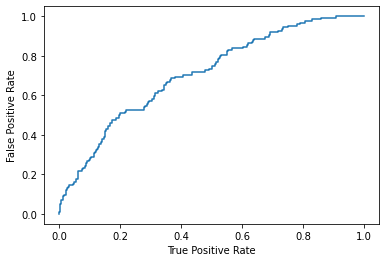

In [466]:
#tpr,fpr, _ = metrics.roc_curve(y_test_y_test_pred_prob)
plt.plot(tpr,fpr)
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.show()

In [306]:
y_train.shape

(3390,)